# 201758073 컴퓨터공학과 홍정완, < 과제 #3 : Regression >

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1) 파일을 읽어 데이터프레임을 생성하고 처음 3개의 샘플을 출력하시오. 특성의 개수와 샘플(관측치)의 개수를 구하고 결측치가 있는지 알아보시오. 수치형 특성과 범주형 특성은 무엇인지 파악하시오. 

In [9]:
df = pd.read_csv('HW3.csv')

In [10]:
df.head(3)

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580


In [72]:
df.info() # 샘플 개수 400개

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  400 non-null    int64  
 1   Income      400 non-null    float64
 2   Limit       400 non-null    int64  
 3   Rating      400 non-null    int64  
 4   Cards       400 non-null    int64  
 5   Age         400 non-null    int64  
 6   Education   400 non-null    int64  
 7   Gender      400 non-null    object 
 8   Student     400 non-null    object 
 9   Married     400 non-null    object 
 10  Ethnicity   400 non-null    object 
 11  Balance     400 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


In [73]:
df.isnull().sum() # 결측치 없음

Unnamed: 0    0
Income        0
Limit         0
Rating        0
Cards         0
Age           0
Education     0
Gender        0
Student       0
Married       0
Ethnicity     0
Balance       0
dtype: int64

In [74]:
df.columns # 특성 수 11개

Index(['Unnamed: 0', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
       'Gender', 'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')

In [75]:
df.describe() # 수치형 특성 : Income, Limit, Rating, Cards, Age, Education, Balance

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,115.614301,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,1.000000,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,100.750000,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,200.500000,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,300.250000,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,400.000000,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


#### 범주형 특성 : Gender, Student, Married, Ethnicity

In [76]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [77]:
df.Student.unique()

array(['No', 'Yes'], dtype=object)

In [78]:
df.Married.unique()

array(['Yes', 'No'], dtype=object)

In [79]:
df.Ethnicity.unique()

array(['Caucasian', 'Asian', 'African American'], dtype=object)

### 2) 수치형 특성과 레이블에 대하여는 히스토그램을 작성하고 범주형 특성에 대하여는 막대그래프를 작성하고 간단히 코멘트 하시오.

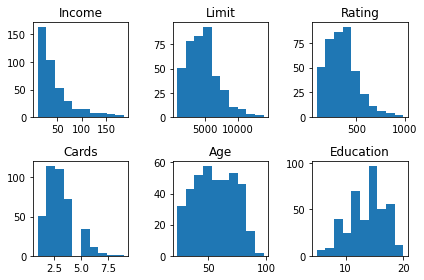

In [19]:
# 수치형 특성과 레이블 -> 히스토그램
plt.subplot(2,3,1)
plt.hist(df.Income,label=[df.Balance])
plt.title("Income")
plt.subplot(2,3,2)
plt.hist(df.Limit,label=[df.Balance])
plt.title("Limit")
plt.subplot(2,3,3)
plt.hist(df.Rating,label=[df.Balance])
plt.title("Rating")
plt.subplot(2,3,4)
plt.hist(df.Cards,label=[df.Balance])
plt.title("Cards")
plt.subplot(2,3,5)
plt.hist(df.Age,label=[df.Balance])
plt.title("Age")
plt.subplot(2,3,6)
plt.hist(df.Education,label=[df.Balance])
plt.title("Education")
plt.tight_layout()

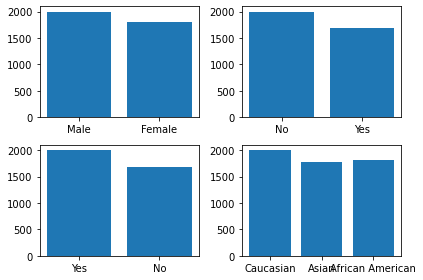

In [20]:
# 범주형 특성과 레이블 -> 막대그래프
plt.subplot(2,2,1)
plt.bar(df.Gender,df.Balance)
plt.subplot(2,2,2)
plt.bar(df.Student,df.Balance)
plt.subplot(2,2,3)
plt.bar(df.Married,df.Balance)
plt.subplot(2,2,4)
plt.bar(df.Ethnicity,df.Balance)
plt.tight_layout()

### 3) 데이터프레임에 corr() 메서드를 적용하여 변수들간의 상관계수를 출력하고 해석하시오. 

In [45]:
df.corr() # 모든 컬럼 간의 Correlation

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Balance
Unnamed: 0,1.000000,0.037203,0.024172,0.021985,-0.036304,0.058603,-0.001415,0.006064
Income,0.037203,1.000000,0.792088,0.791378,-0.018273,0.175338,-0.027692,0.463656
Limit,0.024172,0.792088,1.000000,0.996880,0.010231,0.100888,-0.023549,0.861697
Rating,0.021985,0.791378,0.996880,1.000000,0.053239,0.103165,-0.030136,0.863625
Cards,-0.036304,-0.018273,0.010231,0.053239,1.000000,0.042948,-0.051084,0.086456
Age,0.058603,0.175338,0.100888,0.103165,0.042948,1.000000,0.003619,0.001835
Education,-0.001415,-0.027692,-0.023549,-0.030136,-0.051084,0.003619,1.000000,-0.008062
Balance,0.006064,0.463656,0.861697,0.863625,0.086456,0.001835,-0.008062,1.000000


### 4) 각 수치형 특성과 Balance(잔고) 변수와의 산점도를 아래와 같은 subplot으로 작성하시오.

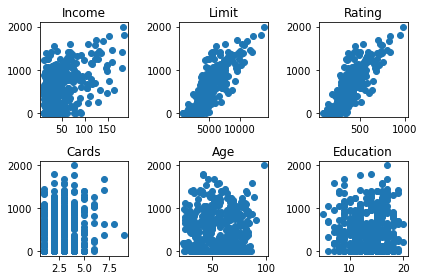

In [80]:
plt.subplot(2,3,1)
plt.scatter(df.Income,df.Balance)
plt.title("Income")
plt.subplot(2,3,2)
plt.scatter(df.Limit,df.Balance)
plt.title("Limit")
plt.subplot(2,3,3)
plt.scatter(df.Rating,df.Balance)
plt.title("Rating")
plt.subplot(2,3,4)
plt.scatter(df.Cards,df.Balance)
plt.title("Cards")
plt.subplot(2,3,5)
plt.scatter(df.Age,df.Balance)
plt.title("Age")
plt.subplot(2,3,6)
plt.scatter(df.Education,df.Balance)
plt.title("Education")

plt.tight_layout()

### 5) Rating(신용점수) 변수를 특성으로 하고 Balance(잔고) 변수를 레이블로 하는 단순선형회귀모형을 훈련하고 산점도에 회귀직선식을 표시하고 이 모형의 결정계수(R^2)을 구하시오.

[[2.56624033]] [-390.84634179]


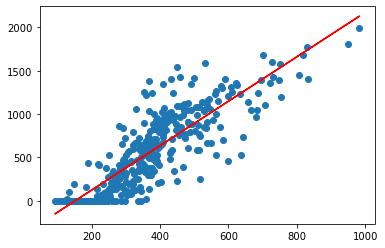

In [81]:
from sklearn.linear_model import LinearRegression

logistic=LinearRegression()
x=df.Rating.to_numpy()
x=x.reshape(-1,1)
y=df.Balance.to_numpy().reshape(-1,1)
logistic.fit(x,y)

print(logistic.coef_,logistic.intercept_)
pred=logistic.predict(x)

plt.scatter(x,y)
plt.plot(x,pred,c="red")

In [82]:
logistic.score(x,y) #결정계수

0.7458484180585037

### 6) 수치형 특성들만 포함하여 데이터를 훈련용과 테스트용으로 7:3으로 분할(random_state=0)하여 선형회귀모형을 훈련시키고 훈련데이터와 테스트데이터에 대한 결정계수를 구하시오. 과대적합이나 과소적합이 의심되는지 코멘트 하시오. Income이 100, Limit가 6000, Rating이 550, Card가 5개, 나이가 55, 교육년수가 20인 사람의 잔고를 예측하시오.

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X=df.drop(['Gender','Student','Married','Balance','Ethnicity','Unnamed: 0'],axis=1).to_numpy()
y=df['Balance'].to_numpy()

In [85]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=0)

In [86]:
new_logistic=LinearRegression()
new_logistic.fit(X_train,y_train)
print(new_logistic.coef_,new_logistic.intercept_)

[-7.90523312  0.15976222  1.56900826 14.42490726 -0.60836095  2.94113733] -486.65943641918363


### 훈련, 테스트데이터 둘 다 성능이 낮음으로 과소적합 판단

In [87]:
new_logistic.score(X_train,y_train) # 훈련데이터 결정계수

0.8857073035585357

In [88]:
new_logistic.score(X_test,y_test) # 테스트데이터 결정계수

0.8557914117915564

In [89]:
test=np.array(['100','6000','550','5','55','20'],dtype=float).reshape(1,-1)
test

array([[1.0e+02, 6.0e+03, 5.5e+02, 5.0e+00, 5.5e+01, 2.0e+01]])

In [90]:
new_logistic.predict(test) # 잔고 예측

array([641.83257176])